In [1]:
import ROOT
import numpy as np
import root_numpy as rnp
from plotly.offline import init_notebook_mode, iplot

In [2]:
NFLOORS = 18
NSTRING = 115
PMTSPERDOM = 31
pmtstot = NFLOORS * NSTRING * PMTSPERDOM
ndoms = NFLOORS * NSTRING

coord_origin = np.asarray((13.887,6.713,405.932))

### execute this cell to load files on server

In [3]:
detfile = "utilities/km3net_jul13_90m.detx"
nuefile = "utilities/km3_v4_nuecc_1.evt.JTE.aa.root"
numufile = "utilities/km3_v4_numucc_1_B.evt.aa.root"

In [7]:
# run this cell for multiple input files
nuefile1 = "utilities/km3_v4_nuecc_1.evt.JTE.aa.root"
numufile1 = "utilities/km3_v4_numucc_1_B.evt.aa.root"
nuefile2 = "utilities/km3_v4_nuecc_2.evt.JTE.aa.root"
numufile2 = "utilities/km3_v4_numucc_2.evt.JTE.aa.root"
nuefile3 = "utilities/km3_v4_nuecc_3.evt.JTE.aa.root"
numufile3 = "utilities/km3_v4_numucc_3.evt.JTE.aa.root"

In [4]:
from load_trees import load_trees

### doms and pmts hit for numu and nue files

In [6]:
# 1 file per type
ch_id_numu, dom_id_numu, trig_numu, times_numu = load_trees(numufile)
ch_id_nue, dom_id_nue, trig_nue, times_nue = load_trees(nuefile)

In [7]:
E_numu = rnp.root2array(numufile, treename='E', branches='Evt.mc_trks.E')
type_numu = rnp.root2array(numufile, treename='E', branches = 'Evt.mc_trks.type')
E_nue = rnp.root2array(nuefile, treename='E', branches='Evt.mc_trks.E')
type_nue = rnp.root2array(nuefile, treename='E', branches = 'Evt.mc_trks.type')

In [8]:
E_numu_ = np.asarray([E_numu[evt][type_numu[evt]==5][0]for evt in range(E_numu.shape[0])])

In [9]:
E_nue_ = np.asarray([E_nue[evt][type_nue[evt]==3][0]for evt in range(E_nue.shape[0])])

In [34]:
(print(np.min(E_numu_), np.max(E_numu_))

(0.76293100000000003, 57513900.0)


In [35]:
print(np.min(E_nue_), np.max(E_nue_))

(2.95282, 78860900.0)


In [10]:
E_numu_[E_numu_>10000].size

700

In [11]:
E_nue_[E_nue_>10000].size

417

In [45]:
np.where(E_numu_>10000)

(array([ 366,  371,  377,  383,  387,  398,  406,  407,  417,  423,  425,
         445,  464,  472,  481,  484,  487,  488,  490,  508,  513,  519,
         528,  536,  538,  545,  550,  551,  563,  583,  585,  592,  602,
         606,  615,  617,  625,  626,  629,  630,  631,  632,  633,  634,
         637,  638,  640,  641,  643,  645,  646,  648,  649,  651,  655,
         656,  658,  659,  660,  661,  666,  667,  668,  669,  671,  672,
         674,  675,  677,  678,  679,  681,  682,  683,  684,  685,  688,
         690,  691,  695,  701,  702,  703,  704,  705,  707,  711,  715,
         716,  717,  718,  719,  720,  723,  724,  725,  726,  730,  732,
         733,  734,  735,  740,  744,  747,  748,  749,  750,  752,  753,
         754,  755,  757,  759,  760,  762,  763,  764,  765,  766,  767,
         769,  771,  774,  777,  780,  781,  782,  783,  785,  788,  789,
         791,  792,  793,  794,  795,  796,  799,  800,  801,  802,  803,
         804,  807,  812,  814,  815, 

In [ ]:
dom_id[evt]

####  multiple input files

In [ ]:
ch_id_numu1, dom_id_numu1, trig_numu1, times_numu1 = load_trees(numufile1)
ch_id_nue1, dom_id_nue1, trig_nue1, times_nue1 = load_trees(nuefile1)

In [ ]:
ch_id_numu2, dom_id_numu2, trig_numu2, times_numu2 = load_trees(numufile2)
ch_id_nue2, dom_id_nue2, trig_nue2, times_nue2 = load_trees(nuefile2)

In [ ]:
ch_id_numu3, dom_id_numu3, trig_numu3, times_numu3 = load_trees(numufile3)
ch_id_nue3, dom_id_nue3, trig_nue3, times_nue3 = load_trees(nuefile3)

### create Data structure with the id of the hit DOMs and the discretized times

In [12]:
from timeslices import tslices
from timeslices import tslices_multi_files

In [13]:
timeslice = tslices(times_numu, times_nue)

(49997887.0, 49993098.0, 50000747.0, 50004225.0, 49993098.0, 50004225.0)


In [9]:
timeslice = tslices_multi_files(times_numu1, times_nue1, times_numu2, times_nue2, times_numu2, times_nue2)

NameError: name 'times_numu1' is not defined

In [ ]:
timeslice

In [ ]:
timeslice.shape[0]

In [ ]:
from data_preparation import Xy_creation

In [ ]:
X_numu, Y_numu  = Xy_creation(timeslice, dom_id_numu, trig_numu, times_numu)

In [ ]:
X_nue, Y_nue = Xy_creation(timeslice, dom_id_nue, trig_nue, times_nue)

### alternative definition of data structure
#### DOMs are now organized in strings and floors
### let"s try this with a convolutional neural network!

In [14]:
from data_preparation import Xy_creation_fl_str

In [15]:
X_numu, Y_numu = Xy_creation_fl_str(timeslice, dom_id_numu, trig_numu, times_numu, 'numu')

In [16]:
X_nue, Y_nue = Xy_creation_fl_str(timeslice, dom_id_nue, trig_nue, times_nue, 'nue')

### try separating low energies from high energies

In [158]:
l_numu = np.where(E_numu_<10000)[0]
l_nue = np.where(E_nue_<10000)[0]

In [159]:
X_numu_low, Y_numu_low = Xy_creation_fl_str(timeslice, dom_id_numu[l_numu], trig_numu[l_numu], times_numu[l_numu], 'numu')
X_nue_low, Y_nue_low = Xy_creation_fl_str(timeslice, dom_id_nue[l_nue], trig_nue[l_nue], times_nue[l_nue], 'nue')

In [160]:
h_numu = np.where(E_numu_>10000)[0]
h_nue = np.where(E_nue_>10000)[0]

In [161]:
X_numu_high, Y_numu_high = Xy_creation_fl_str(timeslice, dom_id_numu[h_numu], trig_numu[h_numu], times_numu[h_numu], 'numu')
X_nue_high, Y_nue_high = Xy_creation_fl_str(timeslice, dom_id_nue[h_nue], trig_nue[h_nue], times_nue[h_nue], 'nue')

#### mutiple files

In [ ]:
X_numu1, Y_numu1 = Xy_creation_fl_str(timeslice, dom_id_numu1, trig_numu1, times_numu1, 'numu')

In [ ]:
X_nue1, Y_nue1 = Xy_creation_fl_str(timeslice, dom_id_nue1, trig_nue1, times_nue1, 'nue')

In [ ]:
X_numu2, Y_numu2 = Xy_creation_fl_str(timeslice, dom_id_numu2, trig_numu2, times_numu2, 'numu')
X_nue2, Y_nue2 = Xy_creation_fl_str(timeslice, dom_id_nue2, trig_nue2, times_nue2, 'nue')

In [ ]:
X_numu3, Y_numu3 = Xy_creation_fl_str(timeslice, dom_id_numu3, trig_numu3, times_numu3, 'numu')
X_nue3, Y_nue3 = Xy_creation_fl_str(timeslice, dom_id_nue3, trig_nue3, times_nue3, 'nue')

In [ ]:
X_numu.shape

In [ ]:
X_nue.shape

### check the shape of the data set 

In [17]:
#single file
print('X_numu: ', X_numu.shape, 'X_nue: ', X_nue.shape, 'Y_numu: ', Y_numu.shape, 'Y_nue: ', Y_nue.shape)

('X_numu: ', (1541, 75, 115, 18), 'X_nue: ', (1183, 75, 115, 18), 'Y_numu: ', (1541,), 'Y_nue: ', (1183,))


In [ ]:
print('X_numu: ', X_numu1.shape, 'X_nue: ', X_nue1.shape, 'Y_numu: ', Y_numu1.shape, 'Y_nue: ', Y_nue1.shape)

In [ ]:
print('X_numu: ', X_numu2.shape, 'X_nue: ', X_nue2.shape, 'Y_numu: ', Y_numu2.shape, 'Y_nue: ', Y_nue2.shape)

In [ ]:
print('X_numu: ', X_numu3.shape, 'X_nue: ', X_nue3.shape, 'Y_numu: ', Y_numu3.shape, 'Y_nue: ', Y_nue3.shape)

In [162]:
print('X_numu: ', X_numu_low.shape, 'X_nue: ', X_nue_low.shape, 'Y_numu: ', Y_numu_low.shape, 'Y_nue: ', Y_nue_low.shape)

('X_numu: ', (841, 75, 115, 18), 'X_nue: ', (766, 75, 115, 18), 'Y_numu: ', (841,), 'Y_nue: ', (766,))


In [163]:
print('X_numu: ', X_numu_high.shape, 'X_nue: ', X_nue_high.shape, 'Y_numu: ', Y_numu_high.shape, 'Y_nue: ', Y_nue_high.shape)

('X_numu: ', (700, 75, 115, 18), 'X_nue: ', (417, 75, 115, 18), 'Y_numu: ', (700,), 'Y_nue: ', (417,))


### append nue to numu data, without mixing : from now on, data will be X an Y

####  single file

In [18]:
X = np.vstack((X_numu, X_nue))

In [19]:
Y = np.concatenate((Y_numu, Y_nue))

In [38]:
E_tot = np.concatenate((E_numu_, E_nue_))

In [40]:
E_tot.size

2724

In [42]:
X.shape

(2724, 75, 115, 18)

In [46]:
print(E_tot[indx2][0], Y[indx2][0])

(12997.799999999999, 0.0)


#### multiple files 

In [ ]:
X_numu = np.vstack((X_numu1, X_numu2))#, X_numu3))
X_nue = np.vstack((X_nue1, X_nue2))#, X_nue3))

In [ ]:
X = np.vstack((X_numu, X_nue))

In [ ]:
Y_numu = np.concatenate((Y_numu1, Y_numu2))#, Y_numu3))
Y_nue = np.concatenate((Y_nue1, Y_nue2))#, Y_nue3))

In [ ]:
Y = np.concatenate((Y_numu, Y_nue))

#### separated energies

In [164]:
X_low = np.vstack((X_numu_low, X_nue_low))

In [165]:
Y_low = np.concatenate((Y_numu_low, Y_nue_low))

In [166]:
X_low.shape

(1607, 75, 115, 18)

In [167]:
Y_low.shape

(1607,)

In [168]:
X_high = np.vstack((X_numu_high, X_nue_high))

In [169]:
Y_high = np.concatenate((Y_numu_high, Y_nue_high))

In [170]:
X_high.shape

(1117, 75, 115, 18)

In [171]:
Y_high.shape

(1117,)

In [172]:
E_numu_low = E_numu_[l_numu]
E_nue_low = E_nue[l_nue]

In [174]:
E_numu_high = E_numu_[h_numu]
E_nue_high = E_nue[h_nue]

In [173]:
E_low = np.concatenate((E_numu_low, E_nue_low))

In [175]:
E_high = np.concatenate((E_numu_high, E_nue_high))

In [ ]:
#save to output file X and Y
#np.save('X_matrix.npy', X)

In [ ]:
#used later in cross validation
#y_numu_categ = np_utils.to_categorical(Y_numu, 2)
#y_nue_categ = np_utils.to_categorical(Y_nue, 2)

In [ ]:
#y = np.concatenate((y_numu_categ, y_nue_categ))

### Use `sklearn` to split train and test data

In [ ]:
#theano

In [20]:
import os
#os.environ["THEANO_FLAGS"]= "mode=FAST_RUN, device=gpu,floatX=float32"
import theano
import keras

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 780 Ti (CNMeM is disabled, cuDNN not available)
Using TensorFlow backend.


In [ ]:
#start here if using tensorflow

In [21]:
import keras
from sklearn.model_selection import train_test_split

from keras.utils import np_utils

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [23]:
print('X_train: ', X_train.shape, 'X_test: ', X_test.shape, 'Y_train: ', Y_train.shape, 'Y_test: ', Y_test.shape)

('X_train: ', (2043, 75, 115, 18), 'X_test: ', (681, 75, 115, 18), 'Y_train: ', (2043,), 'Y_test: ', (681,))


In [26]:
indices = np.arange(X.shape[0])
X_train, X_test, Y_train, Y_test, indx1, indx2 = train_test_split(X, Y, indices, test_size=0.20, random_state=42)

In [34]:
np.all(X[indx2][0]==X_test[0])

True

In [176]:
indices = np.arange(X_high.shape[0])
X_train, X_test, Y_train, Y_test, indx1, indx2 = train_test_split(X_high, Y_high, indices, test_size=0.20, random_state=42)

In [177]:
indx1.size

893

In [178]:
indx2.size

224

In [179]:
np.where(Y_test==1)

(array([  1,   2,   6,   8,  10,  11,  13,  14,  16,  17,  18,  19,  20,
         21,  22,  23,  25,  26,  27,  28,  29,  33,  35,  39,  40,  43,
         45,  48,  49,  50,  51,  52,  54,  57,  58,  60,  65,  66,  68,
         71,  72,  73,  74,  75,  78,  80,  81,  83,  85,  87,  88,  89,
         93,  94,  95,  96, 100, 101, 102, 103, 104, 105, 107, 108, 109,
        110, 111, 116, 117, 119, 121, 122, 127, 128, 131, 134, 135, 137,
        140, 141, 142, 143, 145, 146, 148, 149, 151, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 172,
        173, 176, 178, 180, 181, 182, 188, 189, 192, 194, 195, 196, 197,
        198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 211, 212,
        213, 214, 215, 222, 223]),)

In [ ]:
X_high

### Training with Cross Validation

In [180]:
from sklearn.model_selection import StratifiedKFold

In [181]:
skf = StratifiedKFold(n_splits=5)

In [182]:
best_validation_acc = 0.0
best_model = None

In [50]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy

In [ ]:
# fully connected model. To be used with different dataset (from CNN), because data must be reshaped to 2D
def dense_model():
    ## TRY different activations, e.g. tanh, sigmoid.
    model = Sequential()
    model.add(Dense(2070, input_shape=((Xtrain.shape[1], Xtrain.shape[2])), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2070, activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

####  data format for keras (differen in `th` and `tf`)

In [ ]:
#tensorflow
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
img_channel = X_train.shape[3]
input_shape = (img_rows, img_cols, img_channel)


In [51]:
# theano
img_channel = X_train.shape[1]
img_rows = X_train.shape[2]
img_cols = X_train.shape[3]
input_shape = (img_channel, img_rows, img_cols)


In [52]:
X_train.shape

(2179, 75, 115, 18)

In [53]:
input_shape

(75, 115, 18)

In [54]:
def cnn_model():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    model.add(Convolution2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.1))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()


    return model

In [51]:
def cnn_model_deep():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    model.add(Convolution2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_first'))
    model.add(Dropout(0.25))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_first'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()


    return model

In [39]:
create_nn_model = dense_model

NameError: name 'dense_model' is not defined

In [55]:
create_nn_model = cnn_model

In [52]:
create_nn_model = cnn_model_deep

In [ ]:
create_nn_model = cnn_model_deep2

In [ ]:
create_nn_model = cnn_model_deep3

In [ ]:
create_nn_model = cnn_1d

In [41]:
X_train.shape

(750, 75, 115, 18)

In [ ]:
#Fully connecter netword( w old dataset - ndoms not splitted in strings and floors)

for i, (train_index, validation_index) in enumerate(skf.split(X_FC_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_FC_train[train_index], X_FC_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=115,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=115, epochs=20)  # replicate conf.

predictions = best_model.predict(X_FC_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

In [44]:
#cnn_model - new dataset + tensorflow (with data_format" channel_first ") low energies
# dropout removed
num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=64,
                        epochs=30, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=64, epochs=30)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 113, 16)      86528     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 111, 14)       73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 55, 7)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 53, 5)         18464     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 51, 3)         9248      
_________________________________________________________________
flatten_4 (Flatten)          (None, 4896)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 9794      
Total pa

Train on 601 samples, validate on 149 samples
Epoch 1/30
601/601 [==============================] - 14s - loss: 0.6927 - acc: 0.5258 - val_loss: 0.6922 - val_acc: 0.4966
Epoch 2/30
601/601 [==============================] - 13s - loss: 0.6921 - acc: 0.5241 - val_loss: 0.6915 - val_acc: 0.5168
Epoch 3/30
601/601 [==============================] - 13s - loss: 0.6913 - acc: 0.5408 - val_loss: 0.6906 - val_acc: 0.5973
Epoch 4/30
601/601 [==============================] - 13s - loss: 0.6866 - acc: 0.5907 - val_loss: 0.6868 - val_acc: 0.6107
Epoch 5/30
601/601 [==============================] - 13s - loss: 0.6792 - acc: 0.5458 - val_loss: 0.6773 - val_acc: 0.5034
Epoch 6/30
601/601 [==============================] - 13s - loss: 0.6880 - acc: 0.6007 - val_loss: 0.6682 - val_acc: 0.6510
Epoch 7/30
601/601 [==============================] - 13s - loss: 0.6561 - acc: 0.6539 - val_loss: 0.6429 - val_acc: 0.6174
Epoch 8/30
601/601 [==============================] - 13s - loss: 0.6111 - acc: 0.6839

0.92000000000000004

### 0.92000000000000004

In [184]:
#cnn_model - new dataset + tensorflow (with data_format" channel_first ") hiigh energies
# dropout removed
best_validation_acc = 0.0
best_model = None

num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=64,
                        epochs=30, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=64, epochs=30)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 128, 113, 16)      86528     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 64, 111, 14)       73792     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 55, 7)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 53, 5)         18464     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 51, 3)         9248      
_________________________________________________________________
flatten_11 (Flatten)         (None, 4896)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 9794      
Total pa

Train on 715 samples, validate on 178 samples
Epoch 1/30
715/715 [==============================] - 16s - loss: 0.6678 - acc: 0.6028 - val_loss: 0.6864 - val_acc: 0.6348
Epoch 2/30
715/715 [==============================] - 16s - loss: 0.6239 - acc: 0.6322 - val_loss: 0.5948 - val_acc: 0.6348
Epoch 3/30
715/715 [==============================] - 16s - loss: 0.5302 - acc: 0.6587 - val_loss: 0.5158 - val_acc: 0.8427
Epoch 4/30
715/715 [==============================] - 16s - loss: 0.3728 - acc: 0.8531 - val_loss: 0.4675 - val_acc: 0.8708
Epoch 5/30
715/715 [==============================] - 16s - loss: 0.4504 - acc: 0.8350 - val_loss: 0.4447 - val_acc: 0.8315
Epoch 6/30
715/715 [==============================] - 16s - loss: 0.2826 - acc: 0.8825 - val_loss: 0.4678 - val_acc: 0.8708
Epoch 7/30
715/715 [==============================] - 16s - loss: 0.2777 - acc: 0.8867 - val_loss: 0.4271 - val_acc: 0.9101
Epoch 8/30
715/715 [==============================] - 16s - loss: 0.2306 - acc: 0.9049

0.90625

In [187]:
E_test_h = E_high[indx2]

In [195]:

E_t_h_min = np.min(E_test_h[0])
E_t_h_max = np.max(E_test_h[0])

In [189]:
E_high[indx2][np.floor(Y_test)==cls_predictions].size

203

In [191]:
E_high[indx2][np.floor(Y_test)!=cls_predictions].size

21

In [194]:
E_test_h[0]

array([  9.59698000e+05,   7.24280000e+05,   8.35125000e+03,
         2.24419000e+03,   3.95065000e+02,   6.02405000e+01,
         1.00514000e+01,   5.90483000e+00,   1.67079000e+04,
         2.96511000e+03,   1.71819000e+03,   2.77071000e+03,
         4.41594000e+03,   1.47335000e+03,   1.15395000e+03,
         3.56528000e+02,   4.06618000e+02,   2.19632000e+02,
         3.16779000e+02,   4.15252000e+01,   1.04532000e+02,
         4.14364000e+02,   1.86372000e+00,   2.90795000e-01,
         5.50684000e-01,   4.65552000e-02,   1.22373000e+00,
         4.49609000e-01,   1.48968000e+00,   4.03814000e+04,
         1.44639000e+05,   2.89514000e+03,   4.81284000e+02,
         6.43982000e+02,   5.61965000e+02,   6.85230000e+02,
         3.50410000e+02,   1.41388000e+01,   2.00065000e+01,
         2.45178000e+02,   1.73668000e+02,   4.18585000e+01,
         1.47774000e+02,   7.24280000e+05,   7.78952000e+03,
         2.05613000e+03,   3.27080000e+02,   4.73365000e+01,
         7.01976000e+00,

In [192]:
E_w_h_cls = np.histogram(E_high[indx2][np.floor(Y_test)==cls_predictions], bins=1000, range = (E_t_min, E_t_max))

E_b__h_cls = np.histogram(E_high[indx2][np.floor(Y_test)!=cls_predictions], bins=1000, range = (E_t_min, E_t_max))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [57]:
#cnn_model - new dataset + tensorflow (with data_format" channel_first ") E_tot
# dropout removed
best_validation_acc = 0.0
best_model = None

num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=64,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=64, epochs=30)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 113, 16)      86528     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 111, 14)       73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 55, 7)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 53, 5)         18464     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 51, 3)         9248      
_________________________________________________________________
flatten_4 (Flatten)          (None, 4896)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 9794      
Total pa

Train on 1743 samples, validate on 436 samples
Epoch 1/20
1743/1743 [==============================] - 40s - loss: 0.6815 - acc: 0.5674 - val_loss: 0.6725 - val_acc: 0.5642
Epoch 2/20
1743/1743 [==============================] - 39s - loss: 0.6448 - acc: 0.6254 - val_loss: 0.5969 - val_acc: 0.5803
Epoch 3/20
1743/1743 [==============================] - 39s - loss: 0.5048 - acc: 0.7923 - val_loss: 0.4499 - val_acc: 0.8050
Epoch 4/20
1743/1743 [==============================] - 39s - loss: 0.3546 - acc: 0.8554 - val_loss: 0.3632 - val_acc: 0.8716
Epoch 5/20
1743/1743 [==============================] - 39s - loss: 0.4241 - acc: 0.8772 - val_loss: 0.3566 - val_acc: 0.8830
Epoch 6/20
1743/1743 [==============================] - 39s - loss: 0.2658 - acc: 0.8967 - val_loss: 0.3436 - val_acc: 0.8830
Epoch 7/20
1743/1743 [==============================] - 39s - loss: 0.2486 - acc: 0.9036 - val_loss: 0.3357 - val_acc: 0.8945
Epoch 8/20
1743/1743 [==============================] - 39s - loss: 0.2

0.90091743119266054

In [114]:
for i in range(10):
    print(np.floor(E_tot[indx2][i]), Y_test[i], cls_predictions[i])

(12997.0, 0.0, 0)
(525.0, 0.0, 0)
(20696.0, 1.0, 1)
(2187.0, 0.0, 0)
(1933.0, 1.0, 1)
(6796620.0, 1.0, 1)
(2900.0, 1.0, 1)
(139570.0, 1.0, 0)
(79570.0, 1.0, 1)
(6092.0, 0.0, 0)


In [118]:
for i in range(E_tot[indx2].size):
    if np.floor(Y_test[i])!=cls_predictions[i]:
        print (i, np.floor(E_tot[i]),np.floor( Y_test[i]), cls_predictions[i])

(7, 212.0, 1.0, 0)
(12, 0.0, 0.0, 1)
(13, 150.0, 0.0, 1)
(15, 102.0, 0.0, 1)
(20, 158.0, 0.0, 1)
(30, 192.0, 0.0, 1)
(47, 261.0, 0.0, 1)
(59, 150.0, 1.0, 0)
(60, 193.0, 0.0, 1)
(61, 1007.0, 1.0, 0)
(66, 228.0, 0.0, 1)
(81, 486.0, 1.0, 0)
(96, 536.0, 1.0, 0)
(102, 71.0, 1.0, 0)
(108, 410.0, 1.0, 0)
(116, 686.0, 1.0, 0)
(133, 525.0, 1.0, 0)
(137, 1179.0, 1.0, 0)
(141, 622.0, 1.0, 0)
(151, 2039.0, 1.0, 0)
(186, 258.0, 1.0, 0)
(190, 1811.0, 0.0, 1)
(197, 213.0, 1.0, 0)
(208, 1934.0, 1.0, 0)
(220, 669.0, 1.0, 0)
(221, 658.0, 0.0, 1)
(226, 831.0, 1.0, 0)
(227, 214.0, 0.0, 1)
(232, 695.0, 1.0, 0)
(243, 678.0, 1.0, 0)
(272, 1701.0, 0.0, 1)
(295, 2615.0, 1.0, 0)
(296, 229.0, 1.0, 0)
(297, 822.0, 0.0, 1)
(298, 2728.0, 0.0, 1)
(306, 189.0, 1.0, 0)
(312, 343.0, 0.0, 1)
(316, 3048.0, 1.0, 0)
(319, 2166.0, 1.0, 0)
(338, 2115.0, 1.0, 0)
(359, 891.0, 0.0, 1)
(395, 3859.0, 0.0, 1)
(399, 8055.0, 0.0, 1)
(400, 8893.0, 1.0, 0)
(401, 1306.0, 1.0, 0)
(408, 7250.0, 0.0, 1)
(412, 3829.0, 1.0, 0)
(415, 2643.0,

In [119]:
E_bin = np.arange(E_t_min, E_t_max, 10000)

In [123]:
E_w_cls = np.histogram(E_tot[indx2][np.floor(Y_test)==cls_predictions], bins=1000, range = (E_t_min, E_t_max))

In [125]:
E_b_cls = np.histogram(E_tot[indx2][np.floor(Y_test)!=cls_predictions], bins=1000, range = (E_t_min, E_t_max))

In [126]:
cls_eff = np.true_divide(E_b_cls[0], E_w_cls[0])

In [121]:
E_tot[indx2][np.floor(Y_test)==cls_predictions].size

491

In [122]:
E_tot[indx2][np.floor(Y_test)!=cls_predictions].size

54

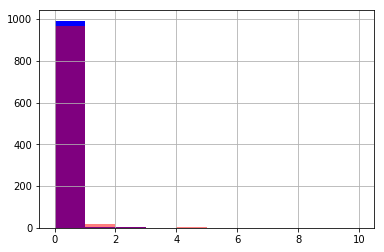

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
#n, bins = plt.hist(cls_eff, 1000, normed=1, facecolor='g', alpha=0.75)
#plt.hist(E_b_cls[0], bins=E_w_cls[1], range = (E_t_min, E_t_max), alpha = 0.5 )
plt.hist(E_b_cls[0], color="blue", range=(0,10))#, bins=E_w_cls[1], range = (E_t_min, E_t_max), alpha = 0.5, color="blue" )
plt.hist(E_w_cls[0], alpha=0.5, color="red", range = (0,10))#, range = (E_t_min, E_t_max))

#plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title('Histogram of well classified events')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [156]:
E_b_cls

(array([45,  2,  0,  0,  1,  0,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 

In [157]:
E_w_cls

(array([397,  27,  14,   9,   4,   4,   2,   4,   1,   2,   0,   2,   0,
          1,   1,   1,   0,   2,   0,   2,   0,   0,   1,   0,   0,   0,
          0,   0,   2,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1

In [155]:
np.all(E_b_cls[1]==E_w_cls[1])

True

In [146]:
E_w_cls[0]

array([397,  27,  14,   9,   4,   4,   2,   4,   1,   2,   0,   2,   0,
         1,   1,   1,   0,   2,   0,   2,   0,   0,   1,   0,   0,   0,
         0,   0,   2,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   

In [137]:
plt.hist?

In [60]:
np.floor(predictions)

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  1.],
       ..., 
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  1.]], dtype=float32)

In [61]:
cls_predictions

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1,

In [62]:
Y_test

array([ 0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0

In [63]:
accuracy_score?

In [65]:
np.where(np.floor(Y_test)!=cls_predictions)[0].size

54

In [66]:
cls_predictions.size

545

In [67]:
Y_test[8]

1.0

In [68]:
cls_predictions[8]

1

In [73]:
(431-38)/431.

0.9118329466357309

In [79]:
X_test

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ..., 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0., 

In [69]:
E_test = E_tot[indx2]

In [75]:
E_t_min = np.min(E_test)

In [76]:
E_t_max = np.max(E_test)

In [111]:
bins = np.arange(E_t_min, E_t_max, 10000)

In [ ]:
np.ara

### 0.91183294663573089

## Try to plot data set (X_train) 

In [ ]:
X_train[0].shape

In [ ]:
def sum_times(evt):
    summed_X = np.sum(X[evt], axis=0)
    #print(summed_X.shape, Y[evt])
    return summed_X

In [ ]:
X.shape

In [ ]:
X_ch_sum = np.asarray([sum_times(evt) for evt in range(X.shape[0])])

In [ ]:
X_ch_sum.shape

In [ ]:
np.where(Y==0.0)

In [ ]:
from matplotlib import pyplot
import matplotlib as mpl
%matplotlib inline

# Displaying the first training data
fig = pyplot.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
#for numu, put evt number < 1541
#img2 = ax2.imshow(sum_times(1500), cmap=mpl.cm.Blues)
img2 = ax2.imshow(X_ch_sum[1500], cmap=mpl.cm.Blues)
#for nue, put 1541< evt number < 2723 
imgplot = ax.imshow(X_ch_sum[2720], cmap=mpl.cm.Blues)

imgplot.set_interpolation('nearest')
img2.set_interpolation('nearest')
#ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
ax.set_title("nue")
ax2.set_title("numu")
ax.grid()

pyplot.show()

In [ ]:
sum_times(1500)[sum_times(1500)!=0]

In [ ]:
sum_times(2720)[sum_times(2720)!=0]